Import Packages

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data: Train and Split

In [13]:
#mode / data parameters
num_classes =10
input_shape= (28,28,1)

#the data, split between train and test sets
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

#scale images to the [0,1] range
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#make sure images have shape (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11490434/11490434 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


Plot figure size of the sample

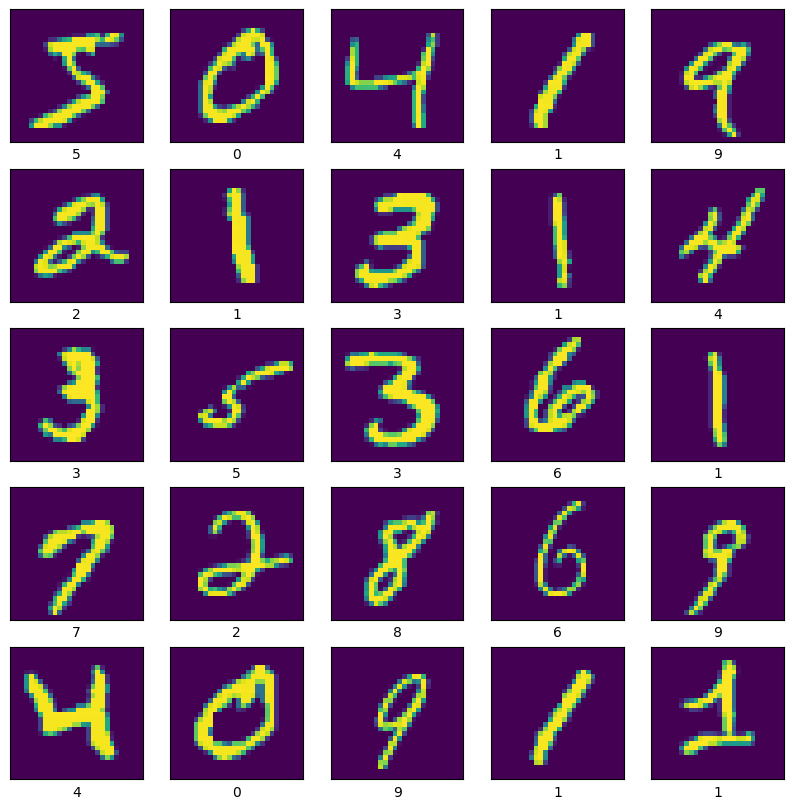

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(x_train[i,:,:,:]))
  #the CIFAR lables happen to be arrays,
  #which is why you need the extra index
  plt.xlabel(y_train[i])
plt.show()

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

Model CNN

In [20]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [23]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 42s 98ms/step - loss: 0.3728 - accuracy: 0.8859 - val_loss: 0.0802 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 44s 104ms/step - loss: 0.1089 - accuracy: 0.9666 - val_loss: 0.0562 - val_accuracy: 0.9852
Epoch 3/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0848 - accuracy: 0.9735 - val_loss: 0.0547 - val_accuracy: 0.9850
Epoch 4/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0698 - accuracy: 0.9783 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 5/15
422/422 [==============================] - 40s 96ms/step - loss: 0.0618 - accuracy: 0.9810 - val_loss: 0.0380 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0546 - accuracy: 0.9830 - val_loss: 0.0326 - val_accuracy: 0.9912
Epoch 7/15
422/422 [==============================] - 39s 92ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0348 - val_accuracy

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss: ", score[0])
print("test accuracy: ", score[1])

test loss:  0.024484554305672646
test accuracy:  0.9926000237464905


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel('accuracy')
plt.ylim([0.5,1])
plt.legenD(loc='LOWER')